# Assignment 2 — Simple & Multiple Linear Regression (Python)



## 1) Load the data and get an overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import pearsonr


Imports for data handling, plotting, linear regression, and correlation tests.

In [2]:
Boston = pd.read_csv("Boston.csv", index_col=0)
Boston.shape


(506, 14)

In [3]:
Boston.shape

(506, 14)

**Interpretation:** `Boston.shape` is `(506, 14)` --> 506 observations and 14 columns (13 predictors + response `medv`).

In [4]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='str')

Column names tell you which variables can be used as predictors and that `medv` is the response.

In [5]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Summary statistics give ranges and scale; this helps spot outliers and decide whether variables are on very different scales.

In [6]:
Boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Previewing rows confirms the file loaded correctly and the values are numeric.

### Quick visual check: predictor vs `medv`

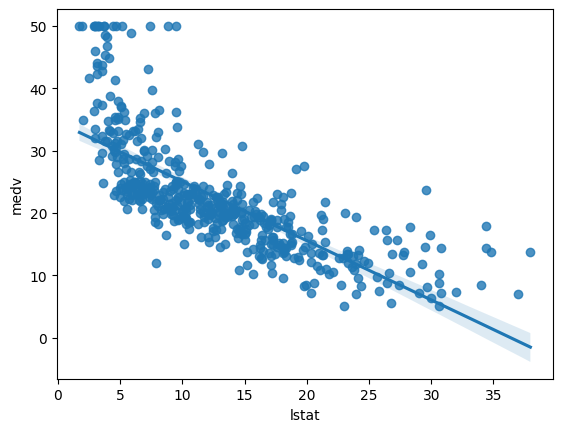

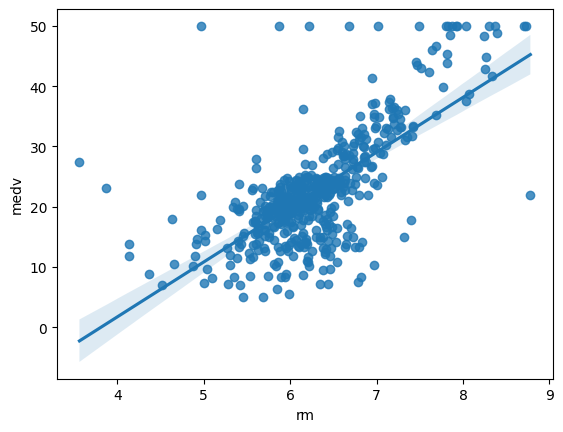

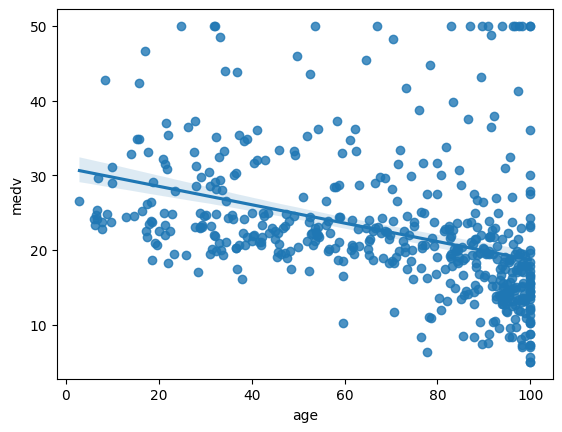

In [7]:
sns.regplot(data=Boston, x="lstat", y="medv")
plt.show()

sns.regplot(data=Boston, x="rm", y="medv")
plt.show()

sns.regplot(data=Boston, x="age", y="medv")
plt.show()

**Interpretation (what you should see):**
- `lstat` vs `medv`: clear negative trend.
- `rm` vs `medv`: clear positive trend.
- `age` vs `medv`: weaker negative trend (noisier).

## 2) Perform simple linear regressions

In [8]:
lm_lstat = smf.ols("medv ~ lstat", data=Boston).fit()
lm_rm = smf.ols("medv ~ rm", data=Boston).fit()
lm_age = smf.ols("medv ~ age", data=Boston).fit()

lm_lstat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           5.08e-88
Time:                        16:42:19   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation (simple models):**
- Look at the slope sign to see direction (up/down).
- Small p-value for the slope means the predictor is associated with `medv`.
- R² tells how much variation is explained by that single predictor.

In [9]:
lm_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           2.49e-74
Time:                        16:42:19   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For `medv ~ rm`, the slope should be positive and statistically significant; R² is fairly high for one predictor.

In [10]:
lm_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           1.57e-18
Time:                        16:42:19   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
age           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For `medv ~ age`, the slope may be significant but R² is smaller, meaning it explains less of the variation.

### 95% confidence intervals for coefficients

In [11]:
lm_lstat.conf_int()
lm_rm.conf_int()
lm_age.conf_int()


,0,1
Intercept,29.015752,32.941604
age,-0.149647,-0.096679


If a slope’s 95% CI does not include 0, that supports the idea that the slope is nonzero.

## 3) Use the simple linear regression models (prediction intervals)

In [12]:
lm_lstat.get_prediction(pd.DataFrame({"lstat":[5,10,15]})).summary_frame(alpha=0.05)[["mean","obs_ci_lower","obs_ci_upper"]]
lm_rm.get_prediction(pd.DataFrame({"rm":[5,6.5,8]})).summary_frame(alpha=0.05)[["mean","obs_ci_lower","obs_ci_upper"]]
lm_age.get_prediction(pd.DataFrame({"age":[25,50,75]})).summary_frame(alpha=0.05)[["mean","obs_ci_lower","obs_ci_upper"]]


,mean,obs_ci_lower,obs_ci_upper
0,27.899610,11.090368,44.708852
1,24.820542,8.043748,41.597335
2,21.741474,4.971031,38.511917


These are predictions from `medv ~ lstat`. The `obs_ci_lower/upper` columns are prediction intervals for individual observations.

In [13]:
lm_rm.get_prediction(pd.DataFrame({"rm":[5,6.5,8]})).summary_frame(alpha=0.05)[["mean","obs_ci_lower","obs_ci_upper"]]

,mean,obs_ci_lower,obs_ci_upper
0,10.839924,-2.214474,23.894322
1,24.493088,11.480391,37.505784
2,38.146251,25.058353,51.234149


Predictions from `medv ~ rm` for selected room counts, with prediction intervals.

In [14]:
lm_age.get_prediction(pd.DataFrame({"age":[25,50,75]})).summary_frame(alpha=0.05)[["mean","obs_ci_lower","obs_ci_upper"]]

,mean,obs_ci_lower,obs_ci_upper
0,27.899610,11.090368,44.708852
1,24.820542,8.043748,41.597335
2,21.741474,4.971031,38.511917


Predictions from `medv ~ age` for selected ages, with prediction intervals.

## 4) Perform multiple linear regressions

In [15]:
lm_multi3 = smf.ols("medv ~ lstat + rm + age", data=Boston).fit()
lm_multi3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Sun, 01 Feb 2026   Prob (F-statistic):          1.20e-110
Time:                        16:42:19   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1753      3.182     -0.369      0.712      -7.427       5.076
lstat         -0.6685      0.054    -12.298      0.000      -0.775      -0.562
rm             5.0191      0.454     11.048      0.000       4.127       5.912
age            0.0091      0.011      0.811      0.418      -0.013       0.031
==============================================================================
Omnibus:                      138.819   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.436
Skew:                           1.296   Prob(JB):                     6.15e-91
Kurtosis:                       6.603   Cond. No.                         985.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation (multiple regression):** each coefficient is a *partial effect* (holding the other predictors fixed).
A predictor can be significant in a simple regression but not in a multiple regression if it overlaps with other predictors.

In [16]:
lm_all = smf.ols("medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat", data=Boston).fit()
lm_all.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Feb 2026   Prob (F-statistic):          6.72e-135
Time:                        16:42:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The full model includes all predictors. R² should be higher, but some predictors may become non-significant due to overlap.

### Correlation matrix

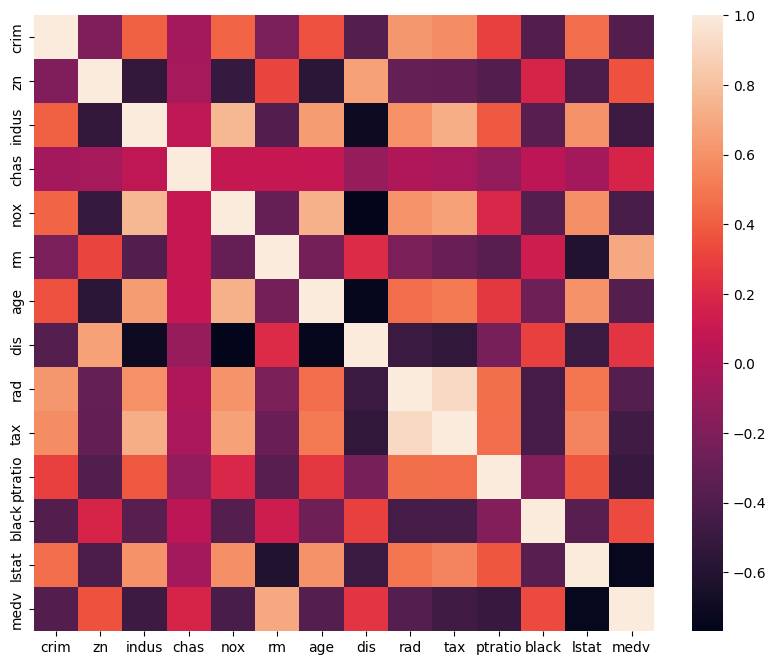

In [17]:
corr = Boston.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False)
plt.show()


The heatmap highlights strongly correlated variables (possible multicollinearity).

### Correlation p-values

In [18]:
cols = Boston.columns
pvals = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols)

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        r, p = pearsonr(Boston[cols[i]], Boston[cols[j]])
        pvals.iat[i, j] = p
        pvals.iat[j, i] = p

pvals


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000e+00,5.506472e-06,1.450349e-21,0.209435,3.751739e-23,6.346703e-07,2.854869e-16,8.519949e-19,2.693844e-56,2.357127e-47,2.942922e-11,2.487274e-19,2.654277e-27,1.173987e-19
zn,5.506472e-06,1.000000e+00,1.289161e-38,0.337810,7.231578e-36,6.935337e-13,7.575575e-45,9.748287e-66,6.988109e-13,4.385492e-13,5.325074e-20,7.207719e-05,2.908736e-22,5.713584e-17
indus,1.450349e-21,1.289161e-38,1.000000e+00,0.157463,7.913361e-98,5.328458e-20,8.409642e-61,3.586280e-78,8.368289e-50,3.018199e-82,3.774843e-19,1.184586e-16,1.381948e-51,4.900260e-31
chas,2.094345e-01,3.378103e-01,1.574628e-01,1.000000,4.029050e-02,4.018410e-02,5.177446e-02,2.568848e-02,8.686789e-01,4.244225e-01,6.203916e-03,2.733379e-01,2.258990e-01,7.390623e-05
nox,3.751739e-23,7.231578e-36,7.913361e-98,0.040291,1.000000e+00,3.818694e-12,7.452392e-86,4.233063e-100,3.342034e-53,1.093287e-66,1.885692e-05,7.816936e-19,5.979284e-49,7.065042e-24
rm,6.346703e-07,6.935337e-13,5.328458e-20,0.040184,3.818694e-12,1.000000e+00,4.459649e-08,3.237746e-06,1.918446e-06,2.086816e-11,1.610820e-16,3.906695e-03,1.033009e-53,2.487229e-74
age,2.854869e-16,7.575575e-45,8.409642e-61,0.051774,7.452392e-86,4.459649e-08,1.000000e+00,9.857534e-92,2.360876e-27,2.551067e-34,2.338885e-09,3.911801e-10,2.783924e-51,1.569982e-18
dis,8.519949e-19,9.748287e-66,3.586280e-78,0.025688,4.233063e-100,3.237746e-06,9.857534e-92,1.000000e+00,1.418269e-32,1.025931e-38,1.229920e-07,2.278649e-11,6.356331e-33,1.206612e-08
rad,2.693844e-56,6.988109e-13,8.368289e-50,0.868679,3.342034e-53,1.918446e-06,2.360876e-27,1.418269e-32,1.000000e+00,4.129920e-195,1.778554e-28,6.592918e-26,9.904457e-32,5.465933e-19
tax,2.357127e-47,4.385492e-13,3.018199e-82,0.424423,1.093287e-66,2.086816e-11,2.551067e-34,1.025931e-38,4.129920e-195,1.000000e+00,5.686833e-28,1.367562e-25,2.583867e-40,5.637734e-29


Very small p-values indicate correlations that are unlikely to be zero in the population.

## 5) Use the multiple linear regression model

In [19]:
lm_multi2 = smf.ols("medv ~ lstat + rm", data=Boston).fit()

selected_predictor_values = pd.DataFrame(
    [(l, r) for r in [5, 6.5, 8] for l in [5, 10, 15]],
    columns=["lstat", "rm"]
)
selected_predictor_values
lm_multi2.get_prediction(selected_predictor_values).summary_frame(alpha=0.05)[["mean","obs_ci_lower","obs_ci_upper"]]


,mean,obs_ci_lower,obs_ci_upper
0,20.903875,9.889729,31.918021
1,17.692084,6.722152,28.662016
2,14.480292,3.537875,25.422709
3,28.546057,17.635923,39.456192
4,25.334266,14.437027,36.231505
5,22.122474,11.221204,33.023745
6,36.188239,25.225479,47.150999
7,32.976448,21.995024,43.957872
8,29.764656,18.747835,40.781477


This predicts `medv` using both `lstat` and `rm`. Because there are two predictors, we create a grid of combinations and predict each.